<a href="https://colab.research.google.com/github/obeabi/Stats/blob/main/Chi2_TestofIndependence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Hands-on: Non-Parametric test with Python
## Date: 30th April 2023
## Prepared by : Abiola Obembe
## Sponsored by : Analysts HQ

In [120]:
# Install pingouin library
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [121]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# scipy libraries
from scipy.stats import chi2_contingency, mannwhitneyu

# pingouin libraries
import pingouin as pg

plt.rcParams['figure.figsize'] = (12.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
%matplotlib inline
print("libraries installed succesfully!")

libraries installed succesfully!


## Dataset (Titanic)

In [122]:
# Extract titanic dataset from seaborn library
df= sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [123]:
## how many rows and columns
df.shape

(891, 15)

In [124]:
# observe data types
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [125]:
## any missing values
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

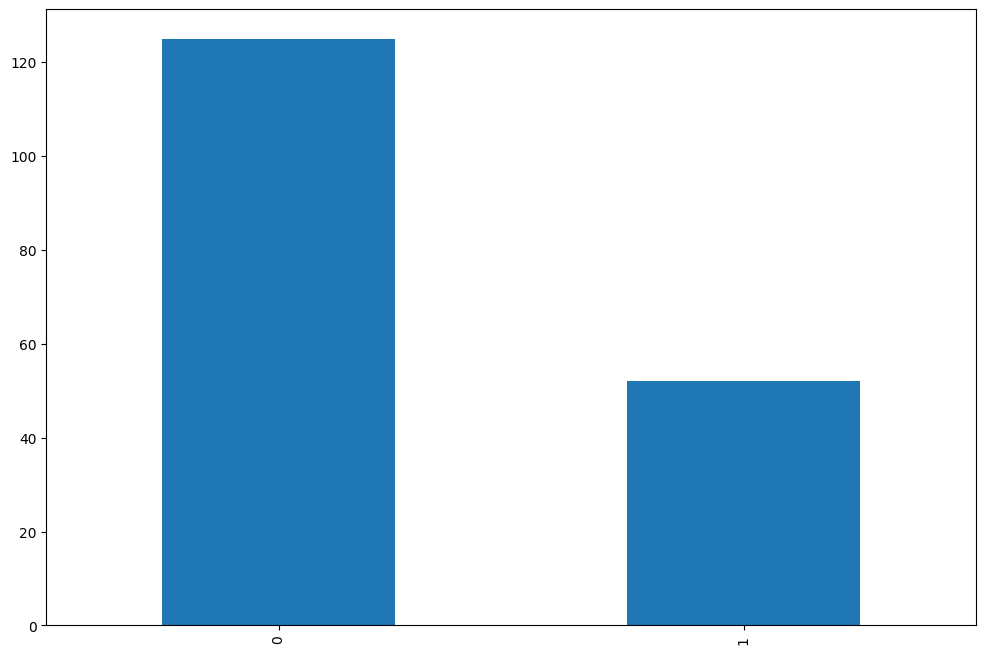

In [126]:
## Investigate if age is missing at random
(df[df.age.isna()]['survived']
 .value_counts()
 .plot(kind='bar')
)
plt.show()

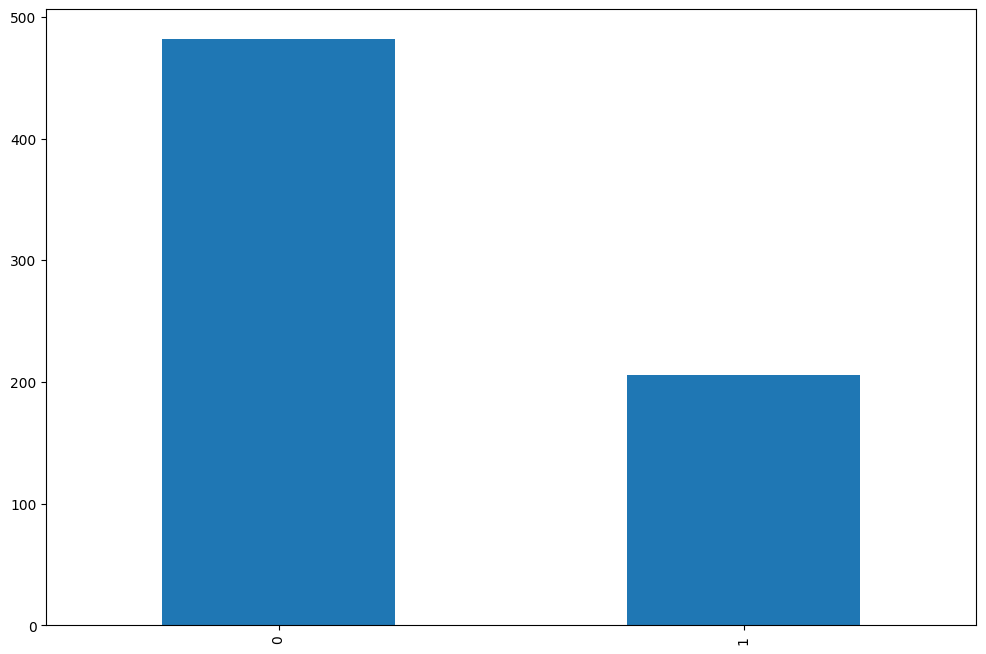

In [127]:
## Investigate if deck is missing at random
(df[df.deck.isna()]['survived']
 .value_counts()
 .plot(kind='bar')
)
plt.show()

The missing values don't seem to be at random as more of these values are from people that did not survive

## Class vs survived i.e. class of people on the ship is independent of whether they survived (Test of independence)

H0: Passengers class on the ship is independent of whether they survived or not

In [128]:
df1 = df[['class', 'survived']]
df1.head()

,class,survived
0,Third,0
1,First,1
2,Third,1
3,First,1
4,Third,0


In [129]:
# Let's summarize this result
survival_counts = pd.crosstab(df1['survived'], df1['class'])
survival_counts

class,First,Second,Third
survived,,,
0,80,97,372
1,136,87,119


In [130]:
# How many passengers by class
survival_counts.sum(axis= 0)

class
First     216
Second    184
Third     491
dtype: int64

In [131]:
# What is the ratio of survival by class
ratio = (survival_counts/survival_counts.sum(axis= 0)).T
      
ratio 

survived,0,1
class,,
First,0.370370,0.629630
Second,0.527174,0.472826
Third,0.757637,0.242363


In [132]:
max(ratio.loc['First',1],ratio.loc['Second',1],ratio.loc['Third',1])

0.6296296296296297

In [133]:
# perform a chi-squared test of independence
chi2, pval, dof, exp_freq = chi2_contingency(survival_counts)


# print the test result
print('Chi-squared test result:')
print('\nChi-squared statistic =', chi2)
print('\np-value =', pval)
print('\nDegrees of freedom =', dof)
print('\nExpected frequencies:')
print(exp_freq)

Chi-squared test result:

Chi-squared statistic = 102.88898875696056

p-value = 4.549251711298793e-23

Degrees of freedom = 2

Expected frequencies:
[[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


In [134]:
# Determine which condition is better based on the test results
if pval < 0.05:
    print('There is a significant association between the two conditions.')
    if (max(ratio.loc['First',1],ratio.loc['Second',1],ratio.loc['Third',1]) == ratio.loc['First',1]):
        print('Passengers in First Class survived more than other classes.')
    elif (max(ratio.loc['First',1],ratio.loc['Second',1],ratio.loc['Third',1]) == ratio.loc['Second',1]):
          print('Passengers in Second Class survived more than other classes.')

    else:
        print('Passengers in Third Class survived more than other classes.')
else:
    print('There is no significant association between the three conditions.')

There is a significant association between the two conditions.
Passengers in First Class survived more than other classes.


## Using Pingouin

In [135]:
result = pg.chi2_independence( data = df1 , x = 'class', y = 'survived')
# print the test result
print('Chi-squared test result:')
result

Chi-squared test result:


(survived           0           1
 class                           
 First     133.090909   82.909091
 Second    113.373737   70.626263
 Third     302.535354  188.464646,
 survived    0    1
 class             
 First      80  136
 Second     97   87
 Third     372  119,
                  test    lambda        chi2  dof          pval    cramer  \
 0             pearson  1.000000  102.888989  2.0  4.549252e-23  0.339817   
 1        cressie-read  0.666667  102.741005  2.0  4.898625e-23  0.339573   
 2      log-likelihood  0.000000  103.547124  2.0  3.273615e-23  0.340902   
 3       freeman-tukey -0.500000  105.128509  2.0  1.484685e-23  0.343496   
 4  mod-log-likelihood -1.000000  107.580420  2.0  4.357212e-24  0.347478   
 5              neyman -2.000000  115.324285  2.0  9.070888e-26  0.359767   
 
    power  
 0    1.0  
 1    1.0  
 2    1.0  
 3    1.0  
 4    1.0  
 5    1.0  )

## Sex vs survived i.e. sex of passenfer on the ship is independent of whether they survived (Test of independence)

In [136]:
# extract dataset
df2 = df[['sex', 'survived']]
df2.head()

,sex,survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0


In [137]:
# Summarize using cross tab
survival_counts = pd.crosstab(df2['survived'], df2['sex'])
survival_counts

sex,female,male
survived,,
0,81,468
1,233,109


In [138]:
# How many passengers by class
survival_counts.sum(axis= 0)

sex
female    314
male      577
dtype: int64

In [139]:
# What is the ratio of survival by class
ratio = (survival_counts/survival_counts.sum(axis= 0)).T
      
ratio 

survived,0,1
sex,,
female,0.257962,0.742038
male,0.811092,0.188908


In [140]:
# perform a chi-squared test of independence
chi2, pval, dof, exp_freq = chi2_contingency(survival_counts)


# print the test result
print('Chi-squared test result:')
print('\nChi-squared statistic =', chi2)
print('\np-value =', pval)
print('\nDegrees of freedom =', dof)
print('\nExpected frequencies:')
print(exp_freq)

Chi-squared test result:

Chi-squared statistic = 260.71702016732104

p-value = 1.1973570627755645e-58

Degrees of freedom = 1

Expected frequencies:
[[193.47474747 355.52525253]
 [120.52525253 221.47474747]]


In [141]:
# Determine which condition is better based on the test results
if pval < 0.05:
    print('There is a significant association between the two conditions.')
    if ratio.loc['female',1]> ratio.loc['male',1]:
        print('Female Passengers survived more than male passengers.')

    else:
        print('Male Passengers survived more than female passengers.')
else:
    print('There is no significant association between the two conditions.')

There is a significant association between the two conditions.
Female Passengers survived more than male passengers.


Using Pingouin library

In [142]:

# perform a chi-squared test of independence
result = pg.chi2_independence(data=df2, x='survived', y='sex')

# print the test result
print('Chi-squared test result:')
print(result)

Chi-squared test result:
(sex           female        male
survived                        
0         193.474747  355.525253
1         120.525253  221.474747, sex       female   male
survived               
0           81.5  467.5
1          232.5  109.5,                  test    lambda        chi2  dof          pval    cramer  \
0             pearson  1.000000  260.717020  1.0  1.197357e-58  0.540936   
1        cressie-read  0.666667  260.413906  1.0  1.394102e-58  0.540621   
2      log-likelihood  0.000000  266.344480  1.0  7.106137e-60  0.546743   
3       freeman-tukey -0.500000  276.922737  1.0  3.517208e-62  0.557494   
4  mod-log-likelihood -1.000000  293.475958  1.0  8.693443e-66  0.573915   
5              neyman -2.000000  349.098487  1.0  6.659745e-78  0.625943   

   power  
0    1.0  
1    1.0  
2    1.0  
3    1.0  
4    1.0  
5    1.0  )


# A/B Testing on Advertsitment clicks
## Whether the advert campign led to more conversions 

In [143]:
# Upload dataset
from google.colab import files


uploaded = files.upload()


Saving advertisement_clicks.csv to advertisement_clicks (1).csv


In [144]:
# Input data as dataframe
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['advertisement_clicks.csv']))
df.head()


,advertisement_id,action
0,B,1
1,B,1
2,A,0
3,B,0
4,A,1


In [145]:
# shape
df.shape

(2000, 2)

## Ad Campaign vs conversion 

In [146]:
# create contigency table
conti_table = pd.crosstab( df['advertisement_id'], df['action'])
conti_table

action,0,1
advertisement_id,,
A,696,304
B,628,372


In [147]:
# How many users saw each ad capaign
conti_table.sum(axis= 1).reset_index(drop =True)

0    1000
1    1000
dtype: int64

In [153]:
# Find the ratio of conversion by ad campaign
conti_table.sum(axis= 1).reset_index(drop =True)
conti_ratio = conti_table/conti_table.sum(axis= 1).reset_index(drop =True)
conti_ratio

action,0,1
advertisement_id,,
A,0.696,0.304
B,0.628,0.372


In [155]:
# perform a chi-squared test of independence
chi2, pval, dof, exp_freq = chi2_contingency(conti_table)


# print the test result
print('Chi-squared test result:')
print('\nChi-squared statistic =', chi2)
print('\np-value =', pval)
print('\nDegrees of freedom =', dof)
print('\nExpected frequencies:')
print(exp_freq)



Chi-squared test result:

Chi-squared statistic = 10.031015928064498

p-value = 0.0015392611623486726

Degrees of freedom = 1

Expected frequencies:
[[662. 338.]
 [662. 338.]]


In [156]:
# Determine which condition is better based on the test results
if pval < 0.05:
    print('There is a significant association between the two conditions.')
    if conti_ratio.loc['A',1] > conti_ratio.loc['B',1]:
        print('Ad Campaign A is better than Campaign B.')
    else:
        print('Ad Campaign B is better than Campaign A.')
else:
    print('There is no significant association between the two campaigns.')

There is a significant association between the two conditions.
Condition B is better than Condition A.
